## Trends in time series
A trend is a long-term increase or decrease in the level of the time series.

- __Faster Modeling__: Perhaps the knowledge of a trend or lack of a trend can suggest methods and make model selection and evaluation more ecient.
- __Simpler Problem__: Perhaps we can correct or remove the trend to simplify modeling and improve model performance.
- __More Data__: Perhaps we can use trend information, directly or as a summary, to provide additional information to the model and improve model performance.

## Types of Trends

- Deterministic Trends : These are trends that consistently increase or decrease
- Stochastic Trends :These are trends that increase and decrease inconsistently

We can also think in terms of scope of observations:
- Global Trends: These are trends that apply to the whole time series.
- Local Trends: These are trends that apply to parts or subsequences of a time series.

Identiyfing a trend could be as easy as by visual inspection from a line plot.

__Removing a trend__: ts with a trend is non-stationary. Once modeled, it can be removed from the time series dataset. This is called detrending the time series. If a dataset does not have a trend or we successfully remove the trend, the dataset is said to be trend stationary.


In [1]:
import pandas as pd

In [2]:
sales = pd.read_csv(r"./Datasets/shampoo.csv",index_col=0)
# start date 1901 01 31 and monthly data then

dates = pd.date_range(start="1901-1-1",freq='M',periods=len(sales))

sales.index = dates

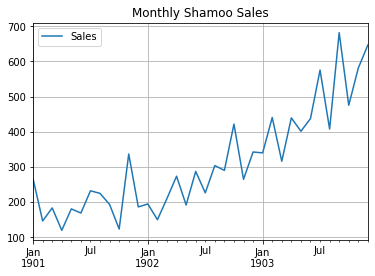

In [3]:
_ = sales.plot(grid=True).set(title='Monthly Shamoo Sales',xlabel='')

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
decomposed = seasonal_decompose(sales,period=12)# period as 12
# we would expect seasonality to be 12

In [6]:
# sales.groupby(sales.index.month).mean().plot.bar(rot=0)
## avergae monthly sales

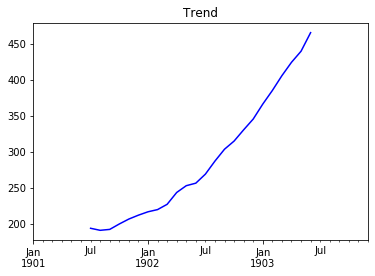

In [7]:
_ = decomposed.trend.plot(style='b').set(title='Trend') # trend # 

## Method 1 : Detrend by Differencing
A new series is constructed where the value at the current time step is calculated 
as the difference between the original observation and the observation at the 
previous time step. value(t) = observation(t) -observation(t-1)


Note:
- linear trend: first difference will suffice
- non linear trend (quadratic) : second order difference will be required


This can be easily applied to out-of-sample data.

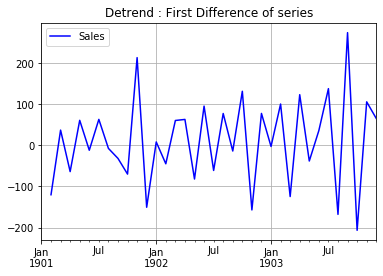

In [8]:
_ = sales.diff().plot(grid=True,style='b').set(title='Detrend : First Difference of series')

## Method 2: Detrend by Model Fitting

A trend is often easily visualized as a line through the observations. Linear trends can be summarized by a linear model, and nonlinear trends may be best summarized using a polynomial or other curve-fitting method. Because of the subjective and domain-specific nature of identifying
trends, this approach can help to identify whether a trend is present. Even fitting a linear model to a trend that is clearly super-linear or exponential can be helpful.

In [9]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [10]:
x = pd.np.arange(1,len(sales)+1)
y = sales.values.reshape(-1,1)

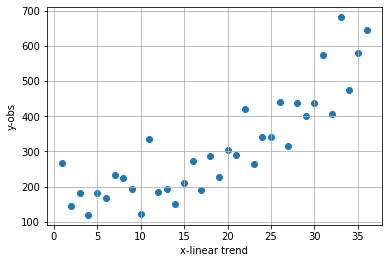

In [11]:
plt.scatter(x,y)
plt.xlabel("x-linear trend")
plt.ylabel("y-obs")
plt.grid(True)

In [12]:
fit = sm.OLS(y,x).fit()

In [13]:
fit.params

array([15.74224361])

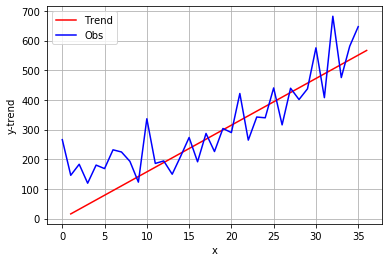

In [14]:
plt.plot(x,fit.predict(x),color='r')
plt.plot(sales.values,color='b')
plt.xlabel("x")
plt.ylabel("y-trend")
plt.grid(True)
_ = plt.legend(['Trend','Obs'])

In [15]:
y_detrend = y - fit.predict(x).reshape(-1,1)

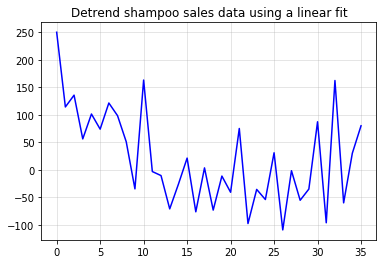

In [16]:
plt.plot(y_detrend,color='b')
plt.grid(True,alpha=.4)
_ = plt.title("Detrend shampoo sales data using a linear fit")

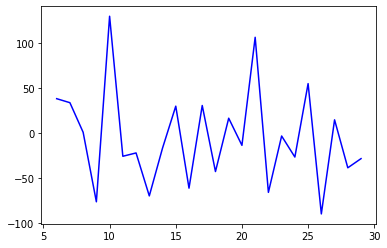

In [17]:
plt.plot(sales.values.reshape(-1,1) - decomposed.trend.values.reshape(-1,1),color='b')
## what if we just substract the trend series obs from decompose function?

## Summary

- About the importance of trend information in time series and how you may be able to use it in machine learning.
- How to use differencing to remove a trend from time series data.
- How to model a linear trend and remove it from time series data.